<h1><center><font size="6"><span style="color:black"> Natural Image Classification with Deep Learning </span></font></center></h1>
<h1><center><font size="5"><span style="color:black"> by Ali Bera Kurunç </span></font></center></h1>
<h1><center><font size="5"><span style="color:black"> Deep Learning Course Project Work </span></font></center></h1>

<h1><center><font size="3"><span style="color:red"> Natural Images Dataset (Kaggle)</span></font></center></h1>
<h1><center><font size="3"><span style="color:red"> A Compiled Dataset of 6899 Images From 8 Distinct Classes. </span></font></center></h1>


Contents:

1.  Analysing and Separating Data

2.  Common Sense Baseline

3.  Creating the CNN Network

4.  Examining Outputs of Model Layers

5.  Training the Model, Plotting Loss and Accuracy Graphs, and Determining the Optimum Epoch

6.  Performance Measurement with Training and Test Data at Optimum Epoch by Combining Train and Validation Data

8.  Removal of Overfitting with Dropout and Performance Measurement with Test Data

9.  Retraining with VGG16

10. Interpretation of the Problem Solving Process


### Analysing and Separating Data
We will import our dataset from Kaggle and then divide it into 3 parts as train - test - validation.

In [1]:
# Loading the libraries

import numpy as np
import matplotlib.pyplot as plt
import os, shutil
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

In [2]:
# Importing and review of data

# We set the folders containing our images and their locations.
airplane_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/airplane" # Directory of images
car_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/car"
cat_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/cat"
dog_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/dog"
flower_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/flower"
fruit_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/fruit"
motorbike_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/motorbike"
person_data = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Main Data/person"
base_dir = "D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Organized Data" # The directory where the Train - Test - Validation folders will be located.
os.makedirs(base_dir, exist_ok = True) # We created the Organized Data folder.
# The reason I use os.makedirs instead of os.mkdir is if the folder exists the code os.mkdir gives an error

# We set the Train - Test - Validation folders.
train_dir = os.path.join(base_dir, "Train") # We created the Train folder in base_dir
os.makedirs(train_dir, exist_ok = True)
test_dir = os.path.join(base_dir, "Test") # We created the Test folder in base_dir
os.makedirs(test_dir, exist_ok = True)
validation_dir = os.path.join(base_dir, "Validation") # We created the Validation folder in base_dir
os.makedirs(validation_dir, exist_ok = True)


We will create a folder for each group of images inside the train - test - validation folders.

Then we will copy our images to these folders.

In [3]:
# We have 8 image classes as airplane - car - cat - dog - flower - fruit - motorbike - person.
# We will create a folder in train - test - validation groups for these classes.

train_airplane_dir = os.path.join(train_dir, "airplane")
test_airplane_dir = os.path.join(test_dir, "airplane")
validation_airplane_dir = os.path.join(validation_dir, "airplane")
os.makedirs(train_airplane_dir, exist_ok = True)
os.makedirs(test_airplane_dir, exist_ok = True)
os.makedirs(validation_airplane_dir, exist_ok = True)

train_car_dir = os.path.join(train_dir, "car")
test_car_dir = os.path.join(test_dir, "car")
validation_car_dir = os.path.join(validation_dir, "car")
os.makedirs(train_car_dir, exist_ok = True)
os.makedirs(test_car_dir, exist_ok = True)
os.makedirs(validation_car_dir, exist_ok = True)

train_cat_dir = os.path.join(train_dir, "cat")
test_cat_dir = os.path.join(test_dir, "cat")
validation_cat_dir = os.path.join(validation_dir, "cat")
os.makedirs(train_cat_dir, exist_ok = True)
os.makedirs(test_cat_dir, exist_ok = True)
os.makedirs(validation_cat_dir, exist_ok = True)

train_dog_dir = os.path.join(train_dir, "dog")
test_dog_dir = os.path.join(test_dir, "dog")
validation_dog_dir = os.path.join(validation_dir, "dog")
os.makedirs(train_dog_dir, exist_ok = True)
os.makedirs(test_dog_dir, exist_ok = True)
os.makedirs(validation_dog_dir, exist_ok = True)

train_flower_dir = os.path.join(train_dir, "flower")
test_flower_dir = os.path.join(test_dir, "flower")
validation_flower_dir = os.path.join(validation_dir, "flower")
os.makedirs(train_flower_dir, exist_ok = True)
os.makedirs(test_flower_dir, exist_ok = True)
os.makedirs(validation_flower_dir, exist_ok = True)

train_fruit_dir = os.path.join(train_dir, "fruit")
test_fruit_dir = os.path.join(test_dir, "fruit")
validation_fruit_dir = os.path.join(validation_dir, "fruit")
os.makedirs(train_fruit_dir, exist_ok = True)
os.makedirs(test_fruit_dir, exist_ok = True)
os.makedirs(validation_fruit_dir, exist_ok = True)

train_motorbike_dir = os.path.join(train_dir, "motorbike")
test_motorbike_dir = os.path.join(test_dir, "motorbike")
validation_motorbike_dir = os.path.join(validation_dir, "motorbike")
os.makedirs(train_motorbike_dir, exist_ok = True)
os.makedirs(test_motorbike_dir, exist_ok = True)
os.makedirs(validation_motorbike_dir, exist_ok = True)

train_person_dir = os.path.join(train_dir, "person")
test_person_dir = os.path.join(test_dir, "person")
validation_person_dir = os.path.join(validation_dir, "person")
os.makedirs(train_person_dir, exist_ok = True)
os.makedirs(test_person_dir, exist_ok = True)
os.makedirs(validation_person_dir, exist_ok = True)

In [4]:
# We will copy our pictures.

# Class - Image count: Airplane - 727, Car - 968, Cat - 885, Dog - 702, Flower - 843, Fruit - 1000, Motorbike - 788, Person - 986.

# I will divide these Images as approximately 60% - 20% - 20% / Train - Test - Validation.

# Since the data is scarce, I divided it as 60% - 20% - 20%, if the data were more, it would be 70 - 15 - 15, etc. I would separate.

fnames = os.listdir(airplane_data) # I pulled the filenames in the folder to the fnames list
for fname in fnames[:427]: # I copied the first 60% images to the train folder.
    src = os.path.join(airplane_data, fname)
    dst = os.path.join(train_airplane_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[427:577]: # I copied the next 20% images to the validation folder.
    src = os.path.join(airplane_data, fname)
    dst = os.path.join(test_airplane_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[577:]: # I copied the next 20% images to the validation folder.
    src = os.path.join(airplane_data, fname)
    dst = os.path.join(validation_airplane_dir, fname)
    shutil.copyfile(src, dst)

# I repeated the same operations for each class

fnames = os.listdir(car_data)
for fname in fnames[:580]:
    src = os.path.join(car_data, fname)
    dst = os.path.join(train_car_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[580:774]:
    src = os.path.join(car_data, fname)
    dst = os.path.join(test_car_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[774:]:
    src = os.path.join(car_data, fname)
    dst = os.path.join(validation_car_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(cat_data)
for fname in fnames[:531]:
    src = os.path.join(cat_data, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[531:708]:
    src = os.path.join(cat_data, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[708:]:
    src = os.path.join(cat_data, fname)
    dst = os.path.join(validation_cat_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(dog_data)
for fname in fnames[:422]:
    src = os.path.join(dog_data, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[422:562]:
    src = os.path.join(dog_data, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[562:]:
    src = os.path.join(dog_data, fname)
    dst = os.path.join(validation_dog_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(flower_data)
for fname in fnames[:505]:
    src = os.path.join(flower_data, fname)
    dst = os.path.join(train_flower_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[505:674]:
    src = os.path.join(flower_data, fname)
    dst = os.path.join(test_flower_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[674:]:
    src = os.path.join(flower_data, fname)
    dst = os.path.join(validation_flower_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(fruit_data)
for fname in fnames[:600]:
    src = os.path.join(fruit_data, fname)
    dst = os.path.join(train_fruit_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[600:800]:
    src = os.path.join(fruit_data, fname)
    dst = os.path.join(test_fruit_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[800:]:
    src = os.path.join(fruit_data, fname)
    dst = os.path.join(validation_fruit_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(motorbike_data)
for fname in fnames[:472]:
    src = os.path.join(motorbike_data, fname)
    dst = os.path.join(train_motorbike_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[472:630]:
    src = os.path.join(motorbike_data, fname)
    dst = os.path.join(test_motorbike_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[630:]:
    src = os.path.join(motorbike_data, fname)
    dst = os.path.join(validation_motorbike_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(person_data)
for fname in fnames[:590]:
    src = os.path.join(person_data, fname)
    dst = os.path.join(train_person_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[590:788]:
    src = os.path.join(person_data, fname)
    dst = os.path.join(test_person_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[788:]:
    src = os.path.join(person_data, fname)
    dst = os.path.join(validation_person_dir, fname)
    shutil.copyfile(src, dst)

Let's draw an example image using the matplotlib library.

An example image from the dataset.


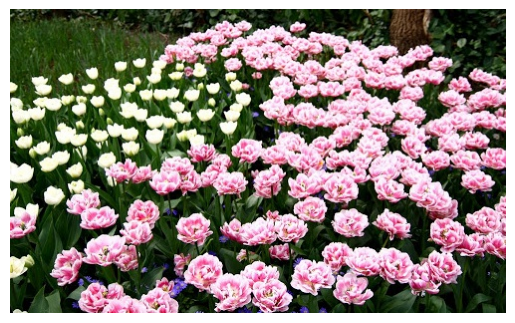

In [5]:
im_plt = plt.imread("D:\Yazılım\Okul\Deep Learning\Ödev\Dataset\Organized Data\Train/flower/flower_0002.jpg")

plt.axis("off")
plt.imshow(im_plt)
print("An example image from the dataset.")

### Common Sense Baseline
We have the distribution of classes - images count as: Airplane - 727, Car - 968, Cat - 885, Dog - 702, Flower - 843, Fruit - 1000, Motorbike - 788, Person - 986. The number of images in the most repetitive class divided by the number of images in all classes will give the "Common Sense Baseline" value.

Number of images in the most repeated class / Total number of images = 1000 / 6899

1000 / 6899 ≅ 0.1449 ---> 0.1449 * 100 ≅ 14.5%

This means that accuracy level above 14.5% will meet the Common Sense Baseline requirement.

### Creating the CNN Network
We will create Network using Conv2D, Maxpooling2D, Flatten functions

In [6]:
# Let's create a network

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu")) # Although our dataset is not complex, I wanted to use multiple layers because we have little data and training will be fast.
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(16, activation = "relu")) 
model.add(layers.Dense(8, activation = "softmax"))

### Examining Outputs of Model Layers
We will get the network output with the summary function.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Training the Model, Plotting Loss and Accuracy Graphs, and Determining the Optimum Epoch
We will create a model with the compile function and create a generator to use different size data as 150x150 pixels.
Then, by training the draft model, we will draw the graphs of the loss and accuracy values and determine the optimum epoch value with these graphs.

In [8]:
# Let's create our model by entering the loss and optimizer functions of CNN Network with the metric types we want it to return to us.

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ["acc"])


In [9]:
# Let's create a generator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

# Let's check the generator outputs.  
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

Found 4127 images belonging to 8 classes.
Found 1386 images belonging to 8 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 8)


In [10]:
# Let's train our model.

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 50
)

model.save("natural_images_classification.h5")

Epoch 1/50


C:\Users\balik\AppData\Local\Temp\ipykernel_12368\1442194959.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 6s 33ms/step - loss: 1.9962 - acc: 0.2003 - val_loss: 1.8041 - val_acc: 0.2730
Epoch 2/50
100/100 [==============================] - 3s 27ms/step - loss: 1.6449 - acc: 0.3480 - val_loss: 1.4153 - val_acc: 0.5390
Epoch 3/50
100/100 [==============================] - 3s 26ms/step - loss: 1.2750 - acc: 0.5798 - val_loss: 1.0775 - val_acc: 0.6250
Epoch 4/50
100/100 [==============================] - 3s 25ms/step - loss: 0.9895 - acc: 0.6645 - val_loss: 0.9567 - val_acc: 0.6650
Epoch 5/50
100/100 [==============================] - 3s 28ms/step - loss: 0.9193 - acc: 0.6683 - val_loss: 0.8328 - val_acc: 0.6880
Epoch 6/50
100/100 [==============================] - 3s 31ms/step - loss: 0.8394 - acc: 0.7015 - val_loss: 0.7280 - val_acc: 0.7420
Epoch 7/50
100/100 [==============================] - 3s 29ms/step - loss: 0.7898 - acc: 0.7210 - val_loss: 0.6788 - val_acc: 0.7610
Epoch 8/50
100/100 [==============================] - 3s 28ms/step - loss: 0.695

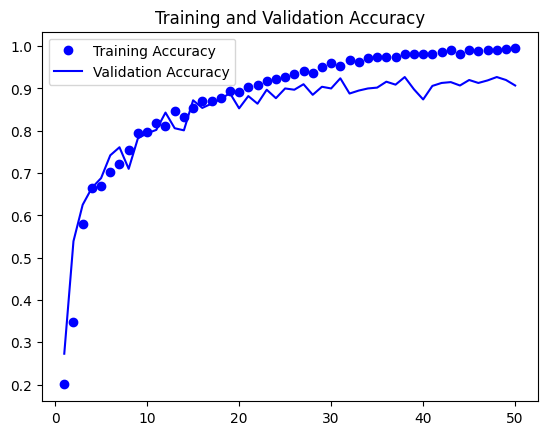

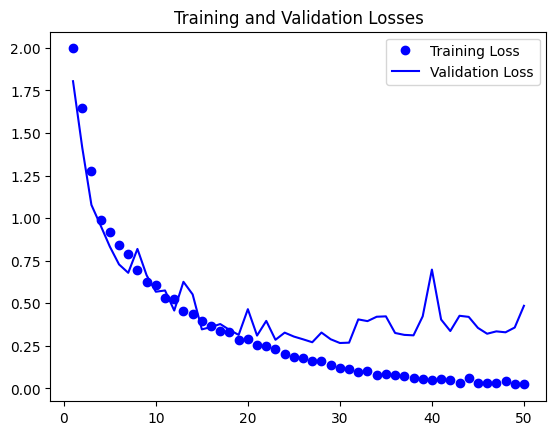

In [11]:
# Let's draw the Loss and Validation graphs.

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss =  history.history["val_loss"]

epochs =  range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Losses")
plt.legend()

plt.show()

As we can see from the graphs, our network starts from 80% accuracy levels and goes up to 90% accuracy levels.

We see that overfitting starts after the 31st epoch, so our optimum epoch value can be taken as 31.

### Performance Measurement with Training and Test Data at Optimum Epoch by Combining Train and Validation Data
We will train our 31 epochsta model by combining the data.

In [12]:
# Let's create a folder for the data.

val_train_dir = os.path.join(base_dir, "Validation Train")
os.makedirs(val_train_dir, exist_ok = True)

val_train_airplane_dir = os.path.join(val_train_dir, "airplane")
os.makedirs(val_train_airplane_dir, exist_ok = True)

val_train_car_dir = os.path.join(val_train_dir, "car")
os.makedirs(val_train_car_dir, exist_ok = True)

val_train_cat_dir = os.path.join(val_train_dir, "cat")
os.makedirs(val_train_cat_dir, exist_ok = True)

val_train_dog_dir = os.path.join(val_train_dir, "dog")
os.makedirs(val_train_dog_dir, exist_ok = True)

val_train_flower_dir = os.path.join(val_train_dir, "flower")
os.makedirs(val_train_flower_dir, exist_ok = True)

val_train_fruit_dir = os.path.join(val_train_dir, "fruit")
os.makedirs(val_train_fruit_dir, exist_ok = True)

val_train_motorbike_dir = os.path.join(val_train_dir, "motorbike")
os.makedirs(val_train_motorbike_dir, exist_ok = True)

val_train_person_dir = os.path.join(val_train_dir, "person")
os.makedirs(val_train_person_dir, exist_ok = True)       

In [ ]:

fnames = os.listdir(airplane_data) 
for fname in fnames[:427]:
    src = os.path.join(airplane_data, fname)
    dst = os.path.join(val_train_airplane_dir, fname)
    shutil.copyfile(src, dst)  
for fname in fnames[577:]:
    src = os.path.join(airplane_data, fname)
    dst = os.path.join(val_train_airplane_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(car_data)
for fname in fnames[:580]:
    src = os.path.join(car_data, fname)
    dst = os.path.join(val_train_car_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[774:]:
    src = os.path.join(car_data, fname)
    dst = os.path.join(val_train_car_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(cat_data)
for fname in fnames[:531]:
    src = os.path.join(cat_data, fname)
    dst = os.path.join(val_train_cat_dir, fname)
    shutil.copyfile(src, dst)   
for fname in fnames[708:]:
    src = os.path.join(cat_data, fname)
    dst = os.path.join(val_train_cat_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(dog_data)
for fname in fnames[:422]:
    src = os.path.join(dog_data, fname)
    dst = os.path.join(val_train_dog_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[562:]:
    src = os.path.join(dog_data, fname)
    dst = os.path.join(val_train_dog_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(flower_data)
for fname in fnames[:505]:
    src = os.path.join(flower_data, fname)
    dst = os.path.join(val_train_flower_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[674:]:
    src = os.path.join(flower_data, fname)
    dst = os.path.join(val_train_flower_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(fruit_data)
for fname in fnames[:600]:
    src = os.path.join(fruit_data, fname)
    dst = os.path.join(val_train_fruit_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[800:]:
    src = os.path.join(fruit_data, fname)
    dst = os.path.join(val_train_fruit_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(motorbike_data)
for fname in fnames[:472]:
    src = os.path.join(motorbike_data, fname)
    dst = os.path.join(val_train_motorbike_dir, fname)
    shutil.copyfile(src, dst)    
for fname in fnames[630:]:
    src = os.path.join(motorbike_data, fname)
    dst = os.path.join(val_train_motorbike_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(person_data)
for fname in fnames[:590]:
    src = os.path.join(person_data, fname)
    dst = os.path.join(val_train_person_dir, fname)
    shutil.copyfile(src, dst)   
for fname in fnames[788:]:
    src = os.path.join(person_data, fname)
    dst = os.path.join(val_train_person_dir, fname)
    shutil.copyfile(src, dst)

We are recreating the same network we created before, but we will use train + validation data for train_generator instead of train data.

For validation_generator, we will use test data instead of validation data.

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(8, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ["acc"])

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    val_train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory( 
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)


Found 5513 images belonging to 8 classes.
Found 1386 images belonging to 8 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 31,
    validation_data = test_generator,
    validation_steps = 50
)

model.save("natural_images_classification_optimum.h5")

Epoch 1/31


C:\Users\balik\AppData\Local\Temp\ipykernel_12368\2122736932.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 4s 30ms/step - loss: 1.8343 - acc: 0.3090 - val_loss: 1.5439 - val_acc: 0.5070
Epoch 2/31
100/100 [==============================] - 3s 29ms/step - loss: 1.3876 - acc: 0.5390 - val_loss: 1.2002 - val_acc: 0.5690
Epoch 3/31
100/100 [==============================] - 3s 28ms/step - loss: 1.0478 - acc: 0.6535 - val_loss: 0.9258 - val_acc: 0.6620
Epoch 4/31
100/100 [==============================] - 3s 28ms/step - loss: 0.8856 - acc: 0.6900 - val_loss: 0.8316 - val_acc: 0.6880
Epoch 5/31
100/100 [==============================] - 3s 28ms/step - loss: 0.7543 - acc: 0.7445 - val_loss: 0.8215 - val_acc: 0.6810
Epoch 6/31
100/100 [==============================] - 3s 28ms/step - loss: 0.6973 - acc: 0.7480 - val_loss: 0.7317 - val_acc: 0.7440
Epoch 7/31
100/100 [==============================] - 3s 27ms/step - loss: 0.6013 - acc: 0.7825 - val_loss: 0.7157 - val_acc: 0.7520
Epoch 8/31
100/100 [==============================] - 3s 30ms/step - loss: 0.568

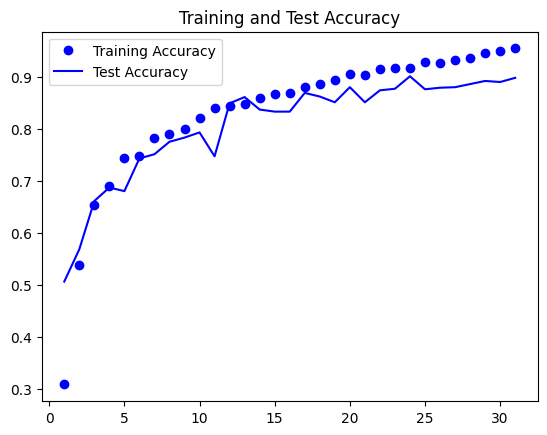

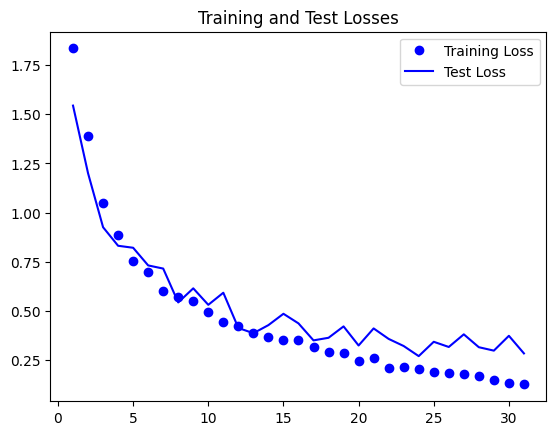

In [15]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss =  history.history["val_loss"]

epochs =  range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Test Accuracy")
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Test Loss")
plt.title("Training and Test Losses")
plt.legend()

plt.show()

As can be seen from the graphs, when we train our model with the optimum epoch, the accuracy is between 87.5% and 90%.

### Removal of Overfitting with Dropout and Performance Measurement with Test Data
We will eliminate overfitting by adding dropouts to the network. We didn't do augmentation because we had enough data for training.

Finally, we will test our model by measuring performance with test data.

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(8, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.RMSprop(learning_rate = 1e-4), metrics = ["acc"])

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

validation_generator = test_datagen.flow_from_directory( 
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

Found 4127 images belonging to 8 classes.
Found 1386 images belonging to 8 classes.


In [17]:

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

model.save("natural_images_classification_droput.h5")

Epoch 1/100


C:\Users\balik\AppData\Local\Temp\ipykernel_12368\2842956047.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 4s 30ms/step - loss: 1.9839 - acc: 0.2073 - val_loss: 1.6520 - val_acc: 0.4470
Epoch 2/100
100/100 [==============================] - 3s 29ms/step - loss: 1.4831 - acc: 0.5015 - val_loss: 1.1274 - val_acc: 0.6470
Epoch 3/100
100/100 [==============================] - 3s 28ms/step - loss: 1.1650 - acc: 0.6265 - val_loss: 0.8960 - val_acc: 0.7000
Epoch 4/100
100/100 [==============================] - 3s 29ms/step - loss: 0.9979 - acc: 0.6570 - val_loss: 0.9311 - val_acc: 0.6510
Epoch 5/100
100/100 [==============================] - 3s 27ms/step - loss: 0.8354 - acc: 0.7085 - val_loss: 0.6489 - val_acc: 0.7710
Epoch 6/100
100/100 [==============================] - 3s 28ms/step - loss: 0.7621 - acc: 0.7270 - val_loss: 0.8729 - val_acc: 0.6940
Epoch 7/100
100/100 [==============================] - 3s 30ms/step - loss: 0.7036 - acc: 0.7574 - val_loss: 0.5145 - val_acc: 0.8140
Epoch 8/100
100/100 [==============================] - 3s 33ms/step - loss

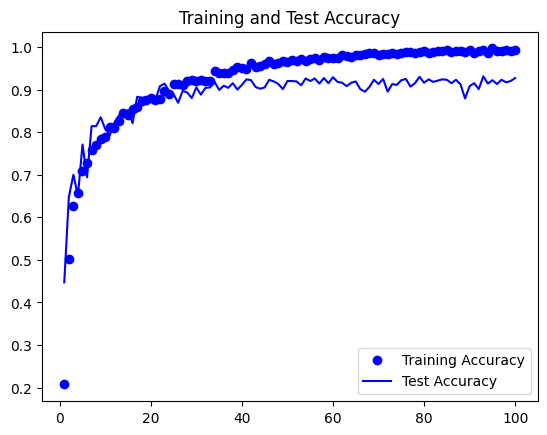

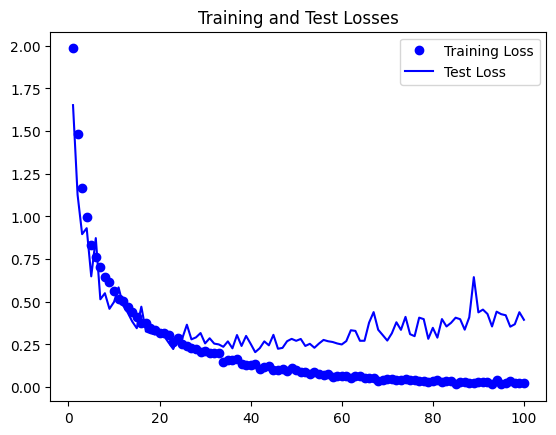

In [18]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss =  history.history["val_loss"]

epochs =  range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Test Accuracy")
plt.title("Training and Test Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Test Loss")
plt.title("Training and Test Losses")
plt.legend()

plt.show()

As we can see from the graphs, using dropout has increased our accuracy from 87.5% to 90%, over 92%.

In [19]:
test_generator = test_datagen.flow_from_directory( 
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

model.evaluate(test_generator)

Found 1386 images belonging to 8 classes.
70/70 [==============================] - 1s 19ms/step - loss: 0.4337 - acc: 0.9221


[0.43370935320854187, 0.9220778942108154]

Finally, we tested our model using test data with the evaluate() function.

While our loss value increased to 0.4337, our accuracy value increased to 92.21%.

### Retraining with VGG16
We will train our model with the prebuilt VGG16 model to increase our Accuracy value.

In [20]:
conv_base = VGG16(weights = "imagenet",
                  include_top = False,
                  input_shape = (150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

As you can see from our output, our block5_pool shape values are 4, 4, 512, so our feature and labels sizes will be set to 4, 4, 512.

Since we have enough data, we will use our conv_base model without data augmentation.

In [21]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape = (sample_count, 4, 4, 512))
    labels = np.zeros(shape = (sample_count, 8))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = "categorical"
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


In [22]:
train_features, train_labels = extract_features(train_dir, 4127)
test_features, test_labels = extract_features(test_dir, 1386)
validation_features, validation_labels = extract_features(validation_dir, 1386)

Found 4127 images belonging to 8 classes.
1/1 [==============================] - 1s 775ms/step
Found 1386 images belonging to 8 classes.
1/1 [==============================] - 1s 753ms/step
Found 1386 images belonging to 8 classes.
1/1 [==============================] - 0s 22ms/step


In [23]:
train_features = np.reshape(train_features, (4127, 4 * 4 * 512))
test_features = np.reshape(test_features, (1386, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1386, 4 * 4 * 512))


In [24]:
model = models.Sequential()
model.add(layers.Dense(512, activation = "relu", input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.RMSprop(learning_rate = 2e-5), metrics = ["acc"])

In [25]:
history = model.fit(
    train_features, train_labels,
    epochs = 30,
    batch_size = 20,
    validation_data = (validation_features, validation_labels))

model.save("natural_images_classification_VGG16.h5")

Epoch 1/30
207/207 [==============================] - 2s 8ms/step - loss: 1.7442 - acc: 0.3443 - val_loss: 1.2320 - val_acc: 0.5440
Epoch 2/30
207/207 [==============================] - 1s 7ms/step - loss: 1.1069 - acc: 0.5920 - val_loss: 0.7197 - val_acc: 0.7799
Epoch 3/30
207/207 [==============================] - 1s 7ms/step - loss: 0.7213 - acc: 0.7618 - val_loss: 0.4517 - val_acc: 0.9004
Epoch 4/30
207/207 [==============================] - 1s 6ms/step - loss: 0.4898 - acc: 0.8704 - val_loss: 0.3069 - val_acc: 0.9408
Epoch 5/30
207/207 [==============================] - 1s 6ms/step - loss: 0.3374 - acc: 0.9244 - val_loss: 0.2078 - val_acc: 0.9560
Epoch 6/30
207/207 [==============================] - 1s 6ms/step - loss: 0.2343 - acc: 0.9448 - val_loss: 0.1539 - val_acc: 0.9618
Epoch 7/30
207/207 [==============================] - 1s 6ms/step - loss: 0.1838 - acc: 0.9564 - val_loss: 0.1359 - val_acc: 0.9639
Epoch 8/30
207/207 [==============================] - 1s 6ms/step - loss: 0.

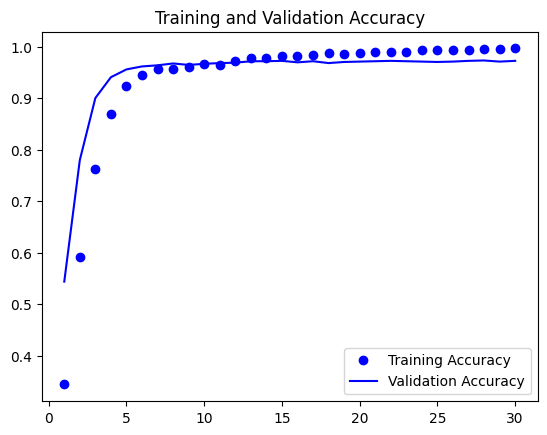

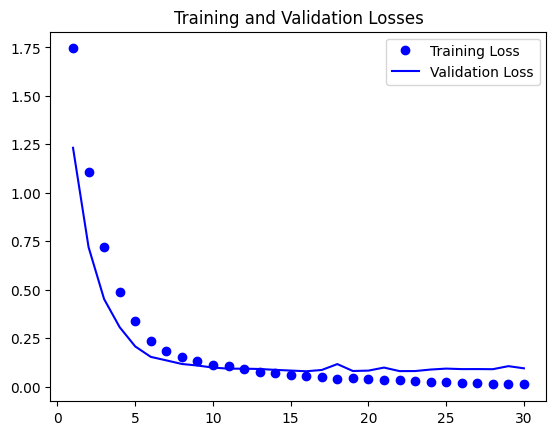

In [26]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss =  history.history["val_loss"]

epochs =  range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Losses")
plt.legend()

plt.show()

We will add our own network with the conv_base model.

In [27]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 512)               4194816   
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 32)               

We will freeze all layers except the last 3 layers, only the block5_conv1, block5_conv2 and block5_conv3 layers will remain trainable.

In [28]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.RMSprop(learning_rate = 1e-5), metrics = ["acc"])

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)

test_generator = test_datagen.flow_from_directory( 
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "categorical"
)


Found 4127 images belonging to 8 classes.
Found 1386 images belonging to 8 classes.
Found 1386 images belonging to 8 classes.


In [30]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 50
)

model.save("natural_images_classification_Frozen.h5")

Epoch 1/50


C:\Users\balik\AppData\Local\Temp\ipykernel_12368\3406579052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 9s 82ms/step - loss: 1.6899 - acc: 0.2526 - val_loss: 1.1992 - val_acc: 0.4700
Epoch 2/50
100/100 [==============================] - 8s 77ms/step - loss: 0.8352 - acc: 0.6628 - val_loss: 0.5861 - val_acc: 0.8560
Epoch 3/50
100/100 [==============================] - 8s 78ms/step - loss: 0.3692 - acc: 0.9250 - val_loss: 0.3591 - val_acc: 0.9110
Epoch 4/50
100/100 [==============================] - 8s 79ms/step - loss: 0.1906 - acc: 0.9653 - val_loss: 0.2017 - val_acc: 0.9470
Epoch 5/50
100/100 [==============================] - 8s 77ms/step - loss: 0.1383 - acc: 0.9743 - val_loss: 0.1481 - val_acc: 0.9610
Epoch 6/50
100/100 [==============================] - 8s 77ms/step - loss: 0.1052 - acc: 0.9750 - val_loss: 0.1162 - val_acc: 0.9710
Epoch 7/50
100/100 [==============================] - 8s 75ms/step - loss: 0.0628 - acc: 0.9864 - val_loss: 0.1169 - val_acc: 0.9680
Epoch 8/50
100/100 [==============================] - 8s 76ms/step - loss: 0.057

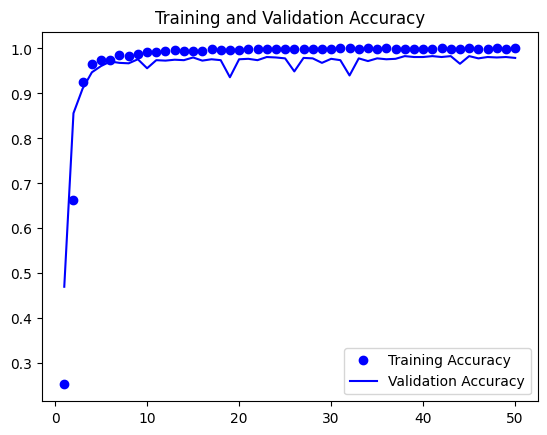

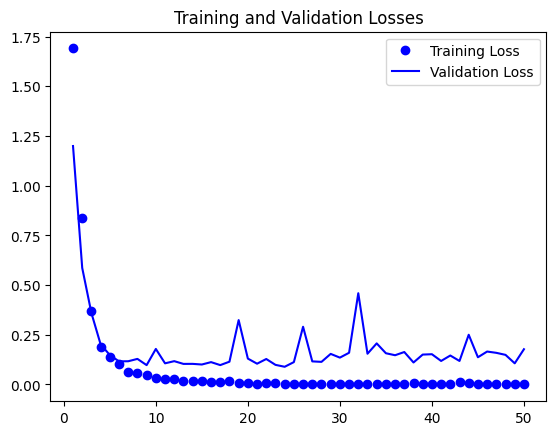

In [31]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss =  history.history["val_loss"]

epochs =  range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Losses")
plt.legend()

plt.show()

In [32]:
model.evaluate(test_generator)

70/70 [==============================] - 3s 42ms/step - loss: 0.1243 - acc: 0.9784


[0.1242883950471878, 0.9783549904823303]

As can be seen from the Graphs and Test data, our loss value and accuracy value have improved with VGG16 and conv_base. The validation result has 0.1773 loss and 97.9% accuracy, and according to the test data, we have 0.1243 (0.2846) loss and 97.83% (89.9% for optimum epoch only) accuracy values.

This means that when operations are performed with methods suitable for the data sets we have, an increase in accuracy values may occur, but this increase will vary according to the data and method.

### Interpretation of the Problem Solving Process

1 - In the deep learning problem, which we started by separating the data we have, we found the optimum epoch number by creating a sketchy model and plotting the accuracy and loss values as the first step.

2 - We have obtained the best accuracy and loss values that can be achieved without using any method that differs from the optimum number of epochs.

3 - Since the number of data in the dataset was sufficient for our problem, we did not need to do augmentation, but augmentation could be done for a better training.

4 - We eliminated the overfitting problem by using Dropout and improved the accuracy and loss values of our model with 100 epochs by going beyond the optimum epoch limit.

5 - Using VGG16 and conv_base, we increased our accuracy, which was around 90% - 93%, to 98% with less epoch number, and we also observed a decrease in our loss values.

6 - I observed that some of the drizzles I used while playing on the model did not affect the accuracy levels for this problem much. I think the reason for this is that simple systems can also solve simple problems.

7 - Although our models and codes are the same, I observed that the accuracy, loss and optimum epoch values changed when I trained the models at different times. For example, while the optimum epoch was 25 in the first training, the 31st epoch in the last training turned out to be the optimum value. The reason for this is that the data in the same class is divided differently in each training.

8 - During the problem solving process, there was no negative result from the methods requested in the homework. Therefore, it can be said that the procedures we performed are suitable for the problem we have.

9 - Different optimizer, loss function etc. In case of application of parameters and methods used, our accuracy and loss value will change positively or negatively.

10 - The model successfully solved the problem by exceeding the common sense baseline accuracy value with a small loss value.